In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import cv2
import os
import pickle
import random
import keras
import imageio

# baseline model for the dogs vs cats dataset
import sys
from matplotlib import pyplot
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Dense
from keras.layers import Flatten
from keras.optimizers import SGD
from keras.preprocessing.image import ImageDataGenerator

# baseline model with dropout for the dogs vs cats dataset
from keras.layers import Dropout

from keras.datasets import cifar10
#importing other required libraries
import numpy as np
import pandas as pd
from sklearn.utils.multiclass import unique_labels
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
#import seaborn as sns
import itertools
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from keras import Sequential
from keras.applications import VGG19 #For Transfer Learning
from keras.preprocessing.image import ImageDataGenerator
from keras.optimizers import SGD,Adam
from keras.callbacks import ReduceLROnPlateau
from keras.layers import Flatten,Dense,BatchNormalization,Activation,Dropout
from keras.utils import to_categorical

import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np

import sys
from matplotlib import pyplot
from keras.utils import to_categorical
from keras.applications.vgg16 import VGG16
from keras.models import Model
from keras.layers import Dense
from keras.layers import Flatten
from keras.optimizers import SGD
from keras.preprocessing.image import ImageDataGenerator


Using TensorFlow backend.


# No Need

In [2]:
import numpy as np

x = np.load('pannuke/images.npy')
y = np.load('pannuke/types.npy')

In [3]:
from numpy import array
from numpy import argmax
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

# integer encode
label_encoder2 = LabelEncoder()
integer_encoded2 = label_encoder2.fit_transform(y)
print(integer_encoded2)

print(y)
# binary encode
onehot_encoder2 = OneHotEncoder(sparse=False)
integer_encoded2 = integer_encoded2.reshape(len(integer_encoded2), 1)
onehot_encoded2 = onehot_encoder2.fit_transform(integer_encoded2)
print(onehot_encoded2)

y = onehot_encoded2

[3 3 3 ... 5 5 5]
['Breast' 'Breast' 'Breast' ... 'Colon' 'Colon' 'Colon']
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [4]:
from sklearn.model_selection import train_test_split
x_test, xx_train, y_test, yy_train  = train_test_split(x, y, test_size=0.85, random_state=42)

xx_train.shape, x_test.shape, yy_train.shape, y_test.shape

((6716, 224, 224, 3), (1185, 224, 224, 3), (6716, 19), (1185, 19))

In [5]:
x_train, x_val, y_train, y_val = train_test_split(xx_train, yy_train, test_size=0.20, random_state=42)

x_train.shape, x_val.shape, y_train.shape, y_val.shape

((5372, 224, 224, 3), (1344, 224, 224, 3), (5372, 19), (1344, 19))

In [6]:
x_train.shape, x_val.shape, x_test.shape, y_train.shape, y_val.shape, y_test.shape

((5372, 224, 224, 3),
 (1344, 224, 224, 3),
 (1185, 224, 224, 3),
 (5372, 19),
 (1344, 19),
 (1185, 19))

In [13]:
np.save("pannuke/Splitted/x_train.npy", x_train)
np.save("pannuke/Splitted/x_val.npy", x_val)
np.save("pannuke/Splitted/x_test.npy", x_test)
np.save("pannuke/Splitted/y_train.npy", y_train)
np.save("pannuke/Splitted/y_val.npy", y_val)
np.save("pannuke/Splitted/y_test.npy", y_test)

# Start Here

In [2]:
x_train=np.load("pannuke/Splitted/x_train.npy")
x_val=np.load("pannuke/Splitted/x_val.npy")

y_train=np.load("pannuke/Splitted/y_train.npy")
y_val=np.load("pannuke/Splitted/y_val.npy")


In [3]:
x_train.shape, x_val.shape, y_train.shape, y_val.shape

((5372, 224, 224, 3), (1344, 224, 224, 3), (5372, 19), (1344, 19))

In [4]:
from keras.applications.imagenet_utils import preprocess_input


train_datagen = ImageDataGenerator(rotation_range = 5, 
                                   shear_range = 0.02,
                                   zoom_range = 0.02, 
                                   samplewise_center=True, 
                                   samplewise_std_normalization= True, 
                                   brightness_range=[0.1, 0.7],
                                   width_shift_range=0.5, 
                                   height_shift_range=0.5,
                                   horizontal_flip=True, 
                                   vertical_flip=True,
                                   rescale=1/255.,              # normalize pixel values between 0-1
                                   preprocessing_function=preprocess_input) # VGG16 preprocessing

train_generator = train_datagen.flow(x_train, y_train, batch_size=32)
valid_generator = train_datagen.flow(x_val, y_val, batch_size=32)



In [5]:
from keras.applications.vgg19 import VGG19
def create_model(input_shape, n_classes, optimizer='rmsprop', fine_tune=0):
    """
    Compiles a model integrated with VGG16 pretrained layers
    
    input_shape: tuple - the shape of input images (width, height, channels)
    n_classes: int - number of classes for the output layer
    optimizer: string - instantiated optimizer to use for training. Defaults to 'RMSProp'
    fine_tune: int - The number of pre-trained layers to unfreeze.
                If set to 0, all pretrained layers will freeze during training
    """
    
    # Pretrained convolutional layers are loaded using the Imagenet weights.
    # Include_top is set to False, in order to exclude the model's fully-connected layers.
    conv_base = VGG19(include_top=False,
                     weights='imagenet', 
                     input_shape=input_shape)
    
    # Defines how many layers to freeze during training.
    # Layers in the convolutional base are switched from trainable to non-trainable
    # depending on the size of the fine-tuning parameter.
    if fine_tune > 0:
        for layer in conv_base.layers[:-fine_tune]:
            layer.trainable = False
    else:
        for layer in conv_base.layers:
            layer.trainable = False

    # Create a new 'top' of the model (i.e. fully-connected layers).
    # This is 'bootstrapping' a new top_model onto the pretrained layers.
    top_model = conv_base.output
    top_model = Flatten(name="flatten")(top_model)
    top_model = Dense(2048, activation='relu')(top_model)
    #top_model = Dropout(0.5)(top_model)
    top_model = Dense(1072, activation='relu')(top_model)
    top_model = Dropout(0.2)(top_model)
    output_layer = Dense(n_classes, activation='softmax')(top_model)
    
    # Group the convolutional base and new fully-connected layers into a Model object.
    model = Model(inputs=conv_base.input, outputs=output_layer)

    # Compiles the model for training.
    model.compile(optimizer=optimizer, 
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
    
    return model

In [6]:
from keras.callbacks import ReduceLROnPlateau
from keras.callbacks import ModelCheckpoint, EarlyStopping

lr_reduce = ReduceLROnPlateau(monitor='val_accuracy', factor=0.6, patience=8, verbose=1, mode='max', min_lr=5e-5)
checkpoint = ModelCheckpoint('merge model vgg19.h5', monitor= 'val_accuracy', mode= 'max', save_best_only = True, verbose= 1)
early_stop = EarlyStopping(monitor='val_accuracy',verbose=1,patience=15,mode='max',restore_best_weights=True)

In [7]:
from keras.callbacks import ReduceLROnPlateau
from keras.callbacks import ModelCheckpoint, EarlyStopping

lr_reduce = ReduceLROnPlateau(monitor='val_accuracy', factor=0.6, patience=8, verbose=1, mode='max', min_lr=5e-5)
checkpoint = ModelCheckpoint('merge model vgg19.h5', monitor= 'val_accuracy', mode= 'max', save_best_only = True, verbose= 1)
early_stop = EarlyStopping(monitor='val_accuracy',verbose=1,patience=15,mode='max',restore_best_weights=True)

# Training Without Fine-Tuning

BATCH_SIZE =32
input_shape = (224, 224, 3)
optim_1 = Adam(learning_rate=0.0001)
n_classes=19

# First we'll train the model without Fine-tuning
vgg_model = create_model(input_shape, n_classes, optim_1, fine_tune=0)


# finAL model
vgg_history = vgg_model.fit(train_generator,
                            epochs=200,
                            validation_data=valid_generator,
                            callbacks=[lr_reduce, checkpoint, early_stop],
                            shuffle=True,
                            verbose=1)



Epoch 1/200
168/168 [==============================] - 69s 411ms/step - loss: 2.1758 - accuracy: 0.3851 - val_loss: 1.7643 - val_accuracy: 0.4576

Epoch 00001: val_accuracy improved from -inf to 0.45759, saving model to merge model vgg19.h5
Epoch 2/200
168/168 [==============================] - 70s 414ms/step - loss: 1.8151 - accuracy: 0.4509 - val_loss: 1.6760 - val_accuracy: 0.4948

Epoch 00002: val_accuracy improved from 0.45759 to 0.49479, saving model to merge model vgg19.h5
Epoch 3/200
168/168 [==============================] - 71s 425ms/step - loss: 1.6859 - accuracy: 0.4920 - val_loss: 1.4815 - val_accuracy: 0.5030

Epoch 00003: val_accuracy improved from 0.49479 to 0.50298, saving model to merge model vgg19.h5
Epoch 4/200
168/168 [==============================] - 72s 427ms/step - loss: 1.6191 - accuracy: 0.5050 - val_loss: 1.9222 - val_accuracy: 0.5491

Epoch 00004: val_accuracy improved from 0.50298 to 0.54911, saving model to merge model vgg19.h5
Epoch 5/200
168/168 [======

168/168 [==============================] - 71s 425ms/step - loss: 0.4795 - accuracy: 0.8475 - val_loss: 0.6892 - val_accuracy: 0.7939

Epoch 00075: val_accuracy did not improve from 0.79613
Epoch 76/200
168/168 [==============================] - 71s 425ms/step - loss: 0.4843 - accuracy: 0.8483 - val_loss: 0.9739 - val_accuracy: 0.7805

Epoch 00076: ReduceLROnPlateau reducing learning rate to 5.999999848427251e-05.

Epoch 00076: val_accuracy did not improve from 0.79613
Epoch 77/200
168/168 [==============================] - 71s 425ms/step - loss: 0.4399 - accuracy: 0.8583 - val_loss: 1.1214 - val_accuracy: 0.8058

Epoch 00077: val_accuracy improved from 0.79613 to 0.80580, saving model to merge model vgg19.h5
Epoch 78/200
168/168 [==============================] - 72s 426ms/step - loss: 0.4214 - accuracy: 0.8611 - val_loss: 0.6827 - val_accuracy: 0.8028

Epoch 00078: val_accuracy did not improve from 0.80580
Epoch 79/200
168/168 [==============================] - 72s 426ms/step - loss:

Training Accuracy: 93.6%

Validation accuracy: 86.8%

Testing Accuracy: 69.4%

In [6]:
from keras.callbacks import ReduceLROnPlateau
from keras.callbacks import ModelCheckpoint, EarlyStopping

lr_reduce = ReduceLROnPlateau(monitor='val_accuracy', factor=0.6, patience=8, verbose=1, mode='max', min_lr=5e-5)
checkpoint = ModelCheckpoint('merge model2 vgg19.h5', monitor= 'val_accuracy', mode= 'max', save_best_only = True, verbose= 1)
early_stop = EarlyStopping(monitor='val_accuracy',verbose=1,patience=15,mode='max',restore_best_weights=True)

# Training Without Fine-Tuning

BATCH_SIZE =32
input_shape = (224, 224, 3)
optim_1 = Adam(learning_rate=0.0001)
n_classes=19

# First we'll train the model without Fine-tuning
vgg_model = create_model(input_shape, n_classes, optim_1, fine_tune=1)


# finAL model
vgg_history = vgg_model.fit(train_generator,
                            epochs=200,
                            validation_data=valid_generator,
                            callbacks=[lr_reduce, checkpoint, early_stop],
                            shuffle=True,
                            verbose=1)



Epoch 1/200
168/168 [==============================] - 71s 424ms/step - loss: 2.1460 - accuracy: 0.3946 - val_loss: 1.5587 - val_accuracy: 0.4330

Epoch 00001: val_accuracy improved from -inf to 0.43304, saving model to merge model2 vgg19.h5
Epoch 2/200
168/168 [==============================] - 69s 408ms/step - loss: 1.8147 - accuracy: 0.4611 - val_loss: 1.5711 - val_accuracy: 0.4896

Epoch 00002: val_accuracy improved from 0.43304 to 0.48958, saving model to merge model2 vgg19.h5
Epoch 3/200
168/168 [==============================] - 70s 416ms/step - loss: 1.6810 - accuracy: 0.4933 - val_loss: 1.9959 - val_accuracy: 0.5022

Epoch 00003: val_accuracy improved from 0.48958 to 0.50223, saving model to merge model2 vgg19.h5
Epoch 4/200
168/168 [==============================] - 71s 422ms/step - loss: 1.6115 - accuracy: 0.5119 - val_loss: 1.8120 - val_accuracy: 0.5037

Epoch 00004: val_accuracy improved from 0.50223 to 0.50372, saving model to merge model2 vgg19.h5
Epoch 5/200
168/168 [==


Epoch 00074: val_accuracy did not improve from 0.80283
Epoch 75/200
168/168 [==============================] - 72s 431ms/step - loss: 0.4349 - accuracy: 0.8567 - val_loss: 0.4825 - val_accuracy: 0.7999

Epoch 00075: val_accuracy did not improve from 0.80283
Epoch 76/200
168/168 [==============================] - 72s 432ms/step - loss: 0.4358 - accuracy: 0.8609 - val_loss: 0.7021 - val_accuracy: 0.7984

Epoch 00076: val_accuracy did not improve from 0.80283
Epoch 77/200
168/168 [==============================] - 74s 439ms/step - loss: 0.4347 - accuracy: 0.8606 - val_loss: 0.5480 - val_accuracy: 0.8058

Epoch 00077: val_accuracy improved from 0.80283 to 0.80580, saving model to merge model2 vgg19.h5
Epoch 78/200
168/168 [==============================] - 72s 431ms/step - loss: 0.4380 - accuracy: 0.8630 - val_loss: 0.7903 - val_accuracy: 0.7917

Epoch 00078: val_accuracy did not improve from 0.80580
Epoch 79/200
168/168 [==============================] - 72s 430ms/step - loss: 0.4324 - a

In [7]:
from keras.callbacks import ReduceLROnPlateau
from keras.callbacks import ModelCheckpoint, EarlyStopping

lr_reduce = ReduceLROnPlateau(monitor='val_accuracy', factor=0.6, patience=8, verbose=1, mode='max', min_lr=5e-5)
checkpoint = ModelCheckpoint('merge model3 vgg19.h5', monitor= 'val_accuracy', mode= 'max', save_best_only = True, verbose= 1)
early_stop = EarlyStopping(monitor='val_accuracy',verbose=1,patience=15,mode='max',restore_best_weights=True)

# Training Without Fine-Tuning

BATCH_SIZE =32
input_shape = (224, 224, 3)
optim_1 = Adam(learning_rate=0.0001)
n_classes=19

# First we'll train the model without Fine-tuning
vgg_model = create_model(input_shape, n_classes, optim_1, fine_tune=2)


# finAL model
vgg_history = vgg_model.fit(train_generator,
                            epochs=200,
                            validation_data=valid_generator,
                            callbacks=[lr_reduce, checkpoint, early_stop],
                            shuffle=True,
                            verbose=1)



Epoch 1/200


ResourceExhaustedError:  OOM when allocating tensor with shape[32,64,224,224] and type float on /job:localhost/replica:0/task:0/device:GPU:0 by allocator GPU_0_bfc
	 [[node block1_conv2_1/convolution (defined at C:\Users\ACER\Documents\ML_DL_projects\project3\env\lib\site-packages\tensorflow_core\python\framework\ops.py:1751) ]]
Hint: If you want to see a list of allocated tensors when OOM happens, add report_tensor_allocations_upon_oom to RunOptions for current allocation info.
 [Op:__inference_keras_scratch_graph_169667]

Function call stack:
keras_scratch_graph


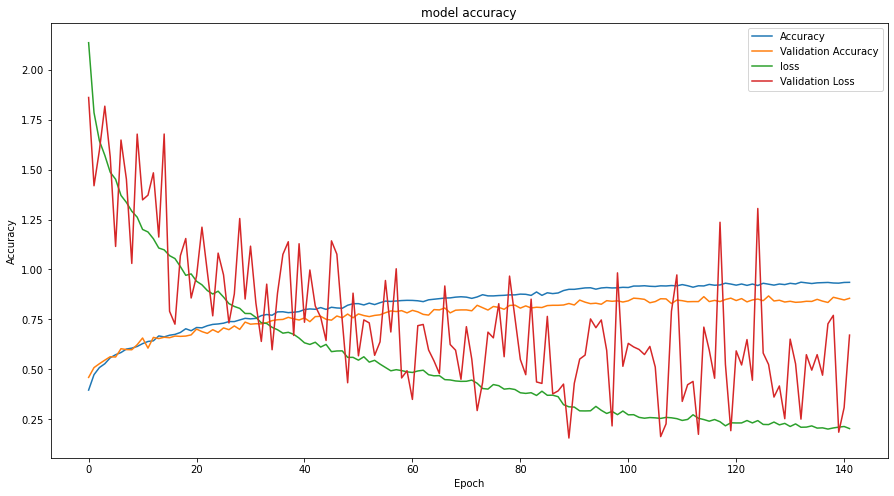

In [8]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,8))
plt.plot(vgg_history.history["accuracy"])
plt.plot(vgg_history.history['val_accuracy'])
plt.plot(vgg_history.history['loss'])
plt.plot(vgg_history.history['val_loss'])
plt.title("model accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.legend(["Accuracy","Validation Accuracy","loss","Validation Loss"])
plt.show()

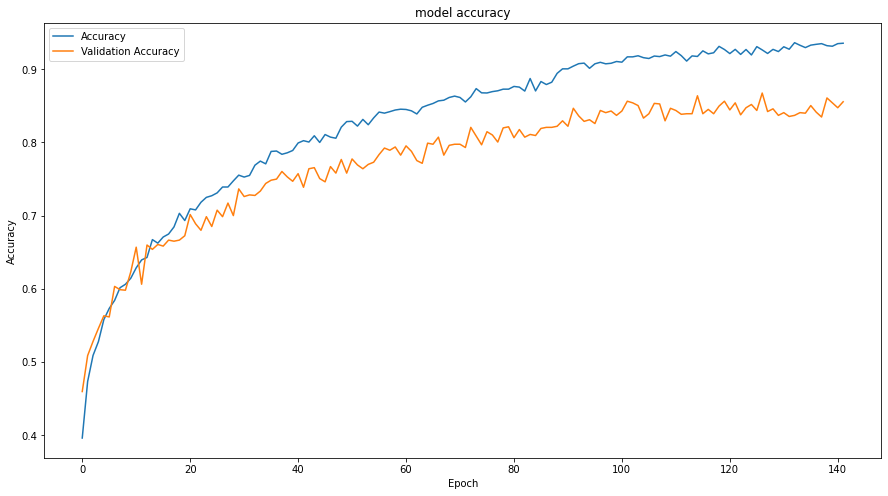

In [9]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,8))
plt.plot(vgg_history.history["accuracy"])
plt.plot(vgg_history.history['val_accuracy'])
#plt.plot(vgg_history.history['loss'])
#plt.plot(vgg_history.history['val_loss'])
plt.title("model accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.legend(["Accuracy","Validation Accuracy"])
plt.show()

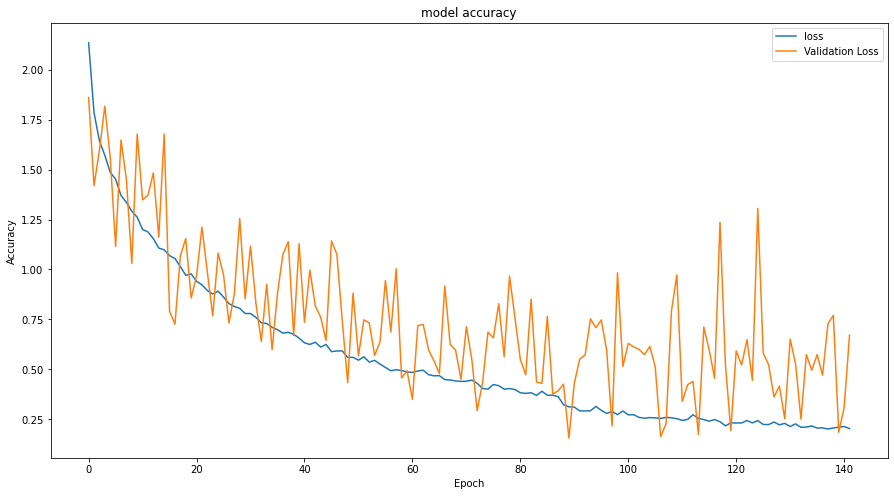

In [10]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,8))
#plt.plot(vgg_history.history["accuracy"])
#plt.plot(vgg_history.history['val_accuracy'])
plt.plot(vgg_history.history['loss'])
plt.plot(vgg_history.history['val_loss'])
plt.title("model accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.legend(["loss","Validation Loss"])
plt.show()

In [9]:
x_test=np.load("pannuke/Splitted/x_test.npy")
y_test=np.load("pannuke/Splitted/y_test.npy")

test_datagen = ImageDataGenerator(preprocessing_function=preprocess_input) # VGG16 preprocessing
test_generator = test_datagen.flow(x_test, y_test, batch_size=32)

In [13]:
# Generate predictions
vgg_model.load_weights('merge model1.h5') # initialize the best trained weights


# Evaluate the model
loss, acc = vgg_model.evaluate(test_generator, verbose=1)
print("Untrained model, accuracy: {:5.2f}%".format(100 * acc))

38/38 [==============================] - 9s 226ms/step
Untrained model, accuracy: 69.37%


In [11]:
vgg_model.save("merge model1.h5")

In [6]:
from keras.callbacks import ReduceLROnPlateau
from keras.callbacks import ModelCheckpoint, EarlyStopping

lr_reduce = ReduceLROnPlateau(monitor='val_accuracy', factor=0.6, patience=5, verbose=1, mode='max', min_lr=5e-5)
checkpoint = ModelCheckpoint('merge model2.h5', monitor= 'val_accuracy', mode= 'max', save_best_only = True, verbose= 1)
early_stop = EarlyStopping(monitor='val_accuracy',verbose=1,patience=20,mode='max',restore_best_weights=True)

In [7]:
# Training Without Fine-Tuning

BATCH_SIZE =32
input_shape = (224, 224, 3)
optim_1 = Adam(learning_rate=0.0001)
n_classes=19

# First we'll train the model without Fine-tuning
vgg_model = create_model(input_shape, n_classes, optim_1, fine_tune=0)


vgg_history = vgg_model.fit(train_generator,
                            epochs=200,
                            validation_data=valid_generator,
                            callbacks=[lr_reduce, checkpoint, early_stop],
                            shuffle=True,
                            verbose=1)


Epoch 1/200
168/168 [==============================] - 73s 435ms/step - loss: 2.1759 - accuracy: 0.3820 - val_loss: 1.3200 - val_accuracy: 0.4583

Epoch 00001: val_accuracy improved from -inf to 0.45833, saving model to merge model2.h5
Epoch 2/200
168/168 [==============================] - 73s 433ms/step - loss: 1.8105 - accuracy: 0.4654 - val_loss: 1.3506 - val_accuracy: 0.5149

Epoch 00002: val_accuracy improved from 0.45833 to 0.51488, saving model to merge model2.h5
Epoch 3/200
168/168 [==============================] - 70s 418ms/step - loss: 1.6589 - accuracy: 0.5087 - val_loss: 1.3039 - val_accuracy: 0.5424

Epoch 00003: val_accuracy improved from 0.51488 to 0.54241, saving model to merge model2.h5
Epoch 4/200
168/168 [==============================] - 72s 426ms/step - loss: 1.5543 - accuracy: 0.5335 - val_loss: 1.7702 - val_accuracy: 0.5372

Epoch 00004: val_accuracy did not improve from 0.54241
Epoch 5/200
168/168 [==============================] - 72s 429ms/step - loss: 1.5059

168/168 [==============================] - 72s 430ms/step - loss: 0.4163 - accuracy: 0.8673 - val_loss: 0.3585 - val_accuracy: 0.7999

Epoch 00075: val_accuracy did not improve from 0.81399
Epoch 76/200
168/168 [==============================] - 75s 445ms/step - loss: 0.4095 - accuracy: 0.8690 - val_loss: 0.6299 - val_accuracy: 0.8043

Epoch 00076: val_accuracy did not improve from 0.81399
Epoch 77/200
168/168 [==============================] - 74s 442ms/step - loss: 0.3876 - accuracy: 0.8788 - val_loss: 0.9591 - val_accuracy: 0.7976

Epoch 00077: val_accuracy did not improve from 0.81399
Epoch 78/200
168/168 [==============================] - 77s 456ms/step - loss: 0.4093 - accuracy: 0.8652 - val_loss: 0.3908 - val_accuracy: 0.8162

Epoch 00078: val_accuracy improved from 0.81399 to 0.81622, saving model to merge model2.h5
Epoch 79/200
168/168 [==============================] - 76s 451ms/step - loss: 0.4010 - accuracy: 0.8701 - val_loss: 0.5510 - val_accuracy: 0.8155

Epoch 00079: val

168/168 [==============================] - 73s 435ms/step - loss: 0.2900 - accuracy: 0.9092 - val_loss: 0.6196 - val_accuracy: 0.8289

Epoch 00114: val_accuracy did not improve from 0.83854
Epoch 115/200
168/168 [==============================] - 72s 431ms/step - loss: 0.2875 - accuracy: 0.9069 - val_loss: 0.5019 - val_accuracy: 0.8341

Epoch 00115: val_accuracy did not improve from 0.83854
Epoch 116/200
168/168 [==============================] - 72s 430ms/step - loss: 0.3092 - accuracy: 0.9008 - val_loss: 0.4384 - val_accuracy: 0.8125

Epoch 00116: val_accuracy did not improve from 0.83854
Epoch 117/200
168/168 [==============================] - 72s 432ms/step - loss: 0.2981 - accuracy: 0.9026 - val_loss: 0.3091 - val_accuracy: 0.8333

Epoch 00117: val_accuracy did not improve from 0.83854
Epoch 118/200
168/168 [==============================] - 72s 428ms/step - loss: 0.2934 - accuracy: 0.9071 - val_loss: 0.4996 - val_accuracy: 0.8326

Epoch 00118: val_accuracy did not improve from 0.

In [6]:
from keras.callbacks import ReduceLROnPlateau
from keras.callbacks import ModelCheckpoint, EarlyStopping

lr_reduce = ReduceLROnPlateau(monitor='val_accuracy', factor=0.6, patience=5, verbose=1, mode='max', min_lr=5e-7)
checkpoint = ModelCheckpoint('merge model3.h5', monitor= 'val_accuracy', mode= 'max', save_best_only = True, verbose= 1)
early_stop = EarlyStopping(monitor='val_accuracy',verbose=1,patience=20,mode='max',restore_best_weights=True)

# Training Without Fine-Tuning

BATCH_SIZE =32
input_shape = (224, 224, 3)
optim_1 = Adam(learning_rate=0.0001)
n_classes=19

# First we'll train the model without Fine-tuning
vgg_model = create_model(input_shape, n_classes, optim_1, fine_tune=0)


vgg_history = vgg_model.fit(train_generator,
                            epochs=200,
                            validation_data=valid_generator,
                            callbacks=[lr_reduce, checkpoint, early_stop],
                            shuffle=True,
                            verbose=1)


Epoch 1/200
168/168 [==============================] - 68s 404ms/step - loss: 2.1638 - accuracy: 0.3792 - val_loss: 2.0205 - val_accuracy: 0.4799

Epoch 00001: val_accuracy improved from -inf to 0.47991, saving model to merge model3.h5
Epoch 2/200
168/168 [==============================] - 67s 399ms/step - loss: 1.7880 - accuracy: 0.4685 - val_loss: 1.5979 - val_accuracy: 0.5134

Epoch 00002: val_accuracy improved from 0.47991 to 0.51339, saving model to merge model3.h5
Epoch 3/200
168/168 [==============================] - 68s 405ms/step - loss: 1.6470 - accuracy: 0.5091 - val_loss: 1.4559 - val_accuracy: 0.5253

Epoch 00003: val_accuracy improved from 0.51339 to 0.52530, saving model to merge model3.h5
Epoch 4/200
168/168 [==============================] - 68s 406ms/step - loss: 1.5599 - accuracy: 0.5356 - val_loss: 1.3207 - val_accuracy: 0.5610

Epoch 00004: val_accuracy improved from 0.52530 to 0.56101, saving model to merge model3.h5
Epoch 5/200
168/168 [==========================

168/168 [==============================] - 71s 422ms/step - loss: 0.3694 - accuracy: 0.8807 - val_loss: 0.6959 - val_accuracy: 0.8274

Epoch 00075: val_accuracy improved from 0.82515 to 0.82738, saving model to merge model3.h5
Epoch 76/200
168/168 [==============================] - 70s 419ms/step - loss: 0.3688 - accuracy: 0.8790 - val_loss: 0.5283 - val_accuracy: 0.8110

Epoch 00076: val_accuracy did not improve from 0.82738
Epoch 77/200
168/168 [==============================] - 70s 418ms/step - loss: 0.3599 - accuracy: 0.8840 - val_loss: 0.5008 - val_accuracy: 0.8266

Epoch 00077: val_accuracy did not improve from 0.82738
Epoch 78/200
168/168 [==============================] - 70s 420ms/step - loss: 0.3722 - accuracy: 0.8796 - val_loss: 0.9424 - val_accuracy: 0.8274

Epoch 00078: val_accuracy did not improve from 0.82738
Epoch 79/200
168/168 [==============================] - 70s 418ms/step - loss: 0.3680 - accuracy: 0.8812 - val_loss: 0.2469 - val_accuracy: 0.8103

Epoch 00079: val

Training Accuracy: 92.8%

Validation accuracy: 86%

Training Accuracy: 69.8%

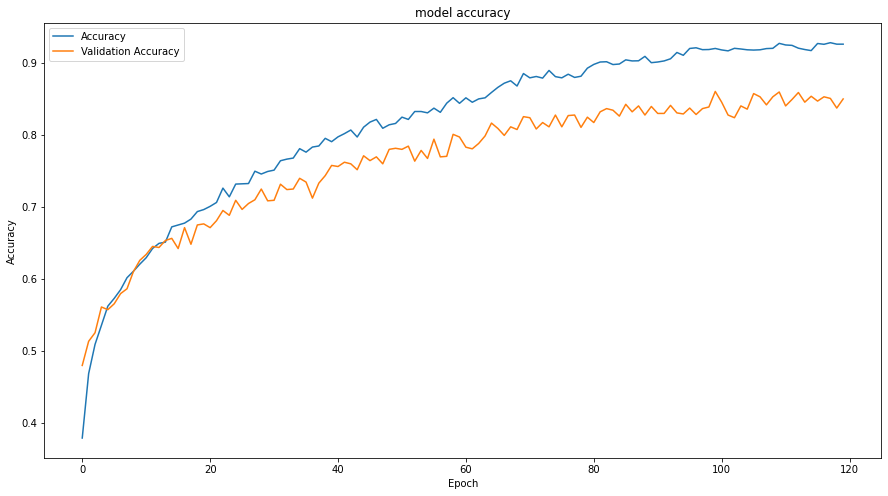

In [7]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,8))
plt.plot(vgg_history.history["accuracy"])
plt.plot(vgg_history.history['val_accuracy'])
#plt.plot(vgg_history.history['loss'])
#plt.plot(vgg_history.history['val_loss'])
plt.title("model accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.legend(["Accuracy","Validation Accuracy"])
plt.show()

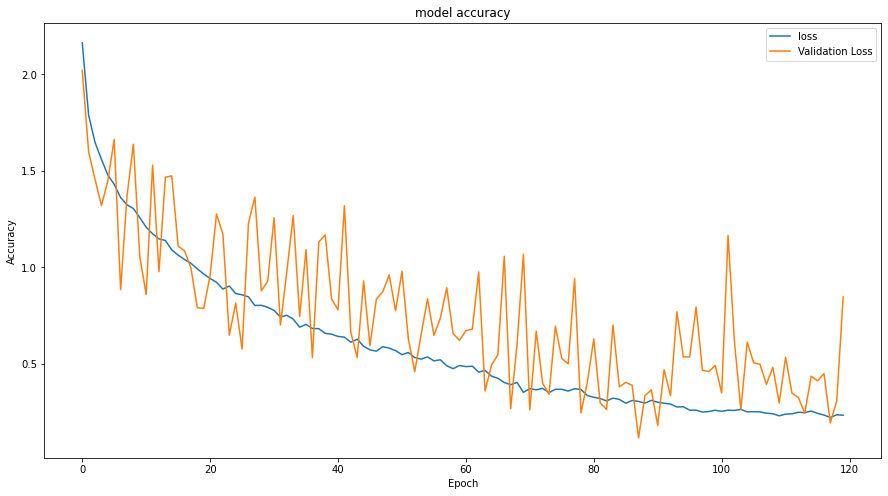

In [8]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,8))
#plt.plot(vgg_history.history["accuracy"])
#plt.plot(vgg_history.history['val_accuracy'])
plt.plot(vgg_history.history['loss'])
plt.plot(vgg_history.history['val_loss'])
plt.title("model accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.legend(["loss","Validation Loss"])
plt.show()

In [10]:
# Generate predictions
vgg_model.load_weights('merge model3.h5') # initialize the best trained weights


# Evaluate the model
loss, acc = vgg_model.evaluate(test_generator, verbose=1)
print("Untrained model, accuracy: {:5.2f}%".format(100 * acc))

38/38 [==============================] - 9s 224ms/step
Untrained model, accuracy: 69.79%


In [11]:
vgg_model.save("merge model3.h5")